## Project Overview

Dataset yang digunakan pada projek ini adalah dataset publik yang tersedia di website kaggle (https://www.kaggle.com/arjunbhasin2013/ccdata). Dataset ini berisi perilaku belanja dan data tidak berlabel yang berkaitan dengan transaksi kartu kredit. Tujuan utama dari penelitian ini adalah untuk menunjukkan segmentasi pelanggan yang paling sesuai dengan dataset ini dengan mengimplementasikan analisa clustering.Algoritma dan metode yang digunakan pada projek ini yaitu algoritma K-Means Clustering, pemilihan algoritma K-means clustering dikarenakan algoritma tersebut lebih efisien dalam menangani dataset yang besar, algoritma sederhana yang mudah untuk dimengerti dan diterapkan. Selain K-means, terdapat teknik lain yang akan digunakan yaitu Principal Component Analysis (PCA) sebagai reduction dimension dataset dengan mengidentifikasi pola untuk mengurangi dimensi dataset. Penggunaan metode PCA juga dapat membantu mengoptimalkan hasil cluster dari K-means clustering dengan mendeteksi cluster tambahan dibandingkan dengan jumlah optimal cluster pada K-means tanpa menggunakan PCA.   Dataset ini memiliki dimensi yang tinggi dan variabel-variabel yang berkorelasi. Data ini berisi transaksi pengguna kartu kredit sebanyak 8949 orang selama 6 bulan, dataset kartu kredit ini memiliki 18 atribut. Berikut deskripsi dari dataset ini, yaitu :

##### Attribute Information

1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases 
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

###### Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
* Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
* Mampu mempersiapkan data untuk digunakan dalam Clustering
* Mampu mengimplementasikan Clustering pada data yang diberikan

## Import Libraries

In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer



warnings.filterwarnings("ignore")
%matplotlib inline

## Loading Dataset

In [180]:
df = pd.read_csv('./dataset/CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Semua column bertipe data kontinu

In [182]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Pada beberapa kolom sepertinya memiliki outlier dan mean memiliki nilai yang lebih besar dibandingkan dengan median hal ini menunjukkan bahwa terdapat beberapa skewness pada dataset, akan dilakukan pengecekan lebih lanjut menggunakan visualisasi boxplot dan histplot dari library seaborn.

In [183]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing value pada kolom CREDIT_LIMIT sebesar 1  dan MINIMUM_PAYMENTS sebesar 313 untuk 2 kolom tersebut akan dilakukan pengisian missing value menggunakan metode median.

In [184]:
df.duplicated().value_counts()

False    8950
dtype: int64

Dataset tidak terdapat duplikat data

## Data Cleaning & EDA

In [185]:
# Pengisian missing value
ms_col = ['CREDIT_LIMIT','MINIMUM_PAYMENTS']
for col in ms_col:
    df.loc[df[col].isna()==True,col] = df[col].mean()
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Dataset sudah tidak terdapat missing value

In [186]:
# Drop CUST_ID karna tidak berpengaruh pada proses clustering
df.drop('CUST_ID', axis=1, inplace=True)

In [187]:
df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         206
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

#### Plotting variabel frekuensi menjadi chart histogram

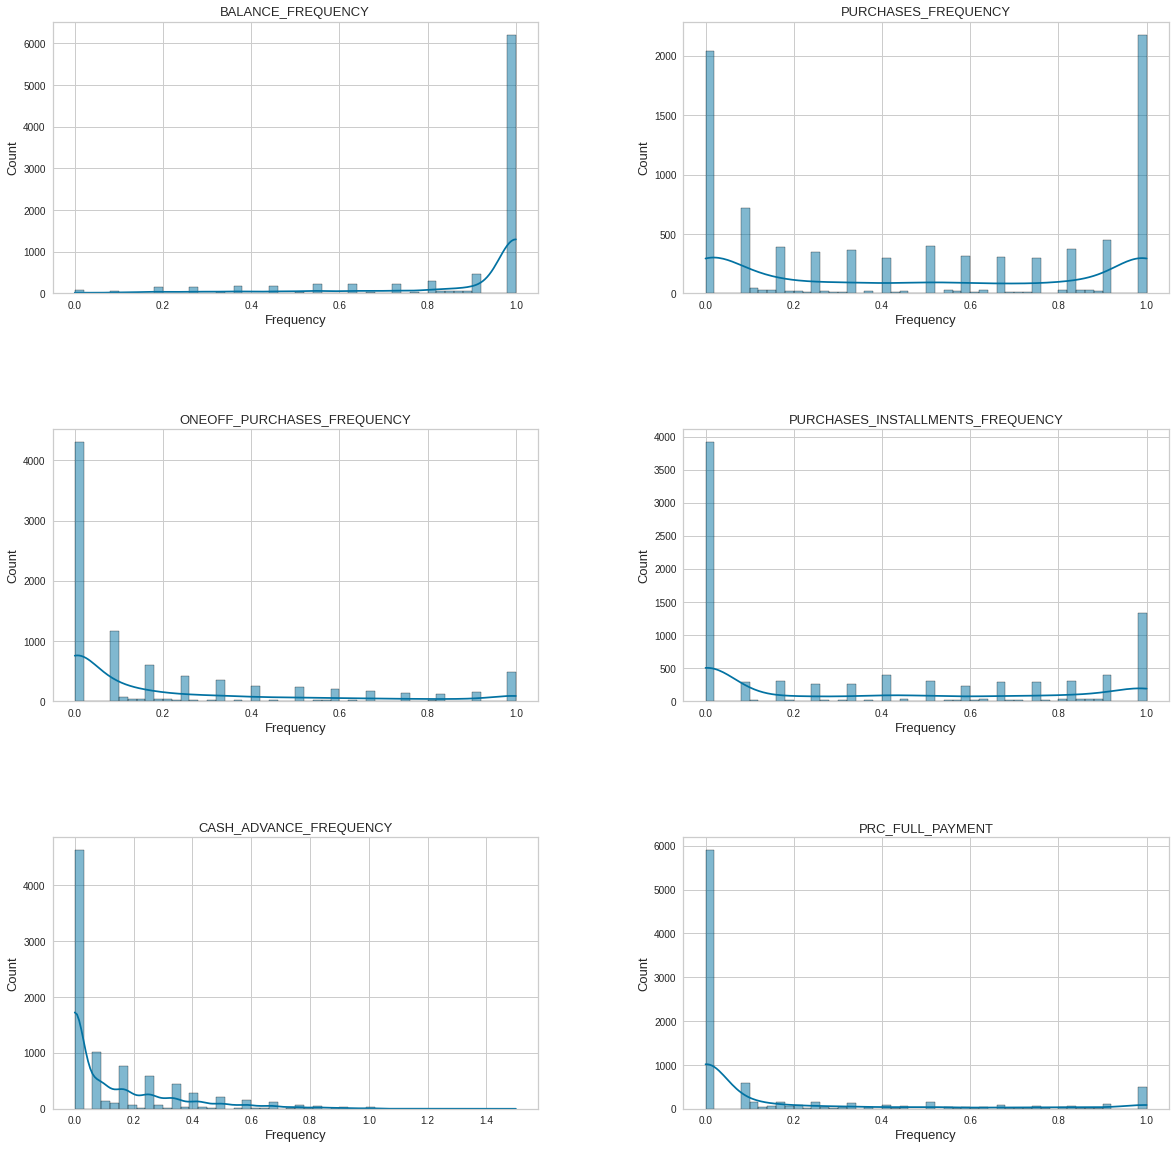

In [188]:
var_freq = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_freq):
    plt.subplot(3,2,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel('Frequency', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=50,kde=True)
    plt.savefig('variabel_frekuensi.png')
    

Beberapa fitur sepertinya mengalami frekuensi yang cukup Jarang seperti pada fitur ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT. untuk fitur PURCHASES_FREQUENCY memiliki frekuensi yang cukup merata antara frekuensi yang cukup sering dan tidak.

###### Cek Variabel yang lain untuk melihat distribusi data

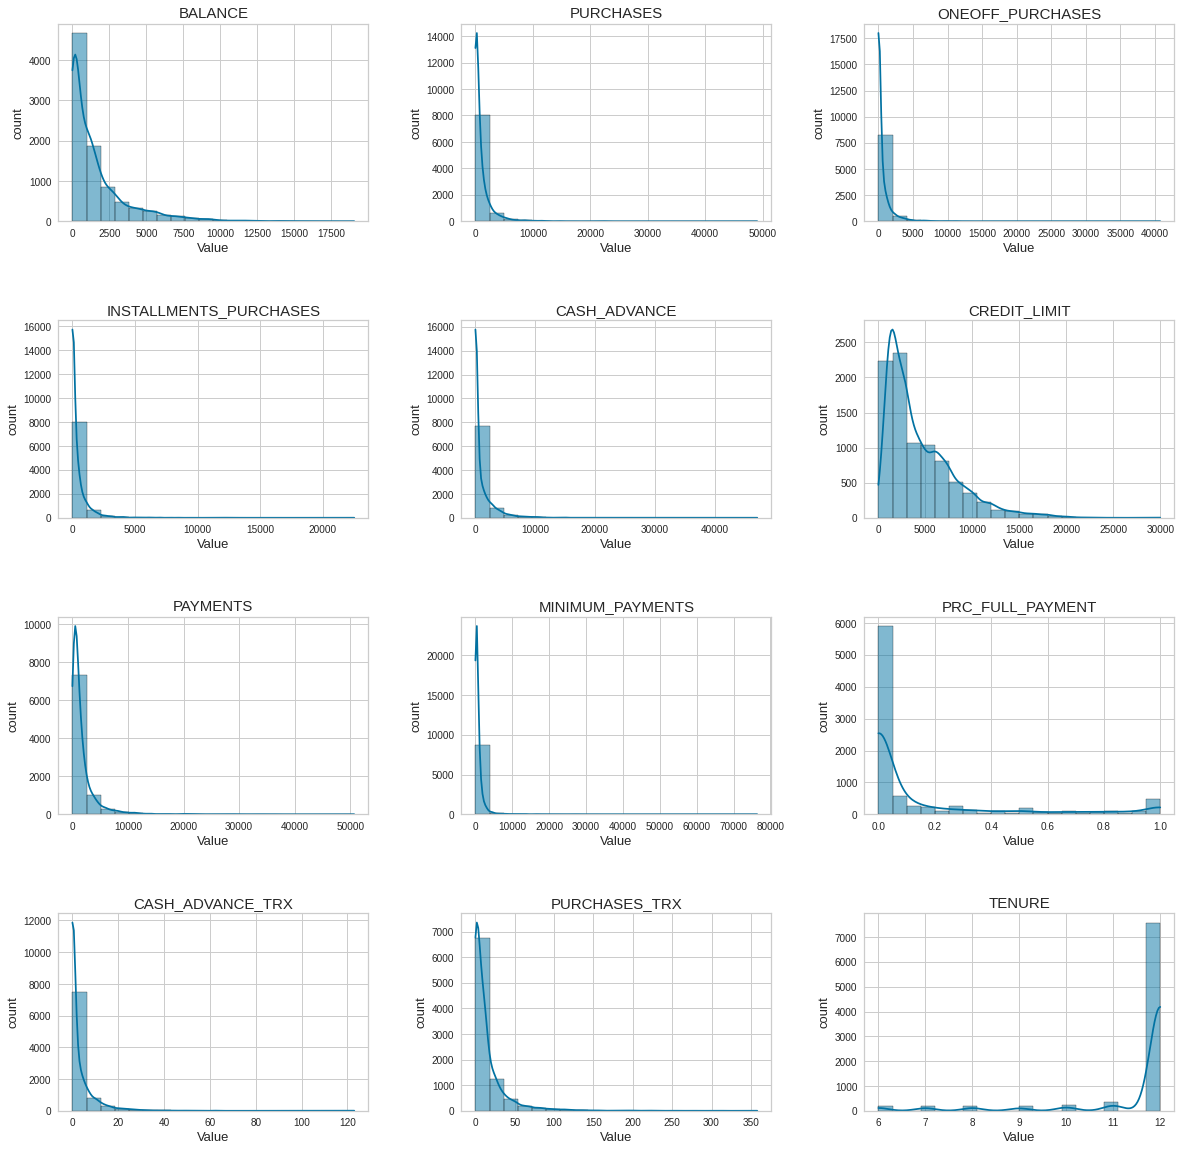

In [189]:
var_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT',
           'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(4,3,i+1)
    plt.title(col, fontsize=15)
    plt.xlabel("Value", fontsize=13)
    plt.ylabel("count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.savefig('variabel_cek.png')

Semua fitur diatas terlihat memiliki distribusi yang tidak normal, distribusi data tersebut mengalamai skewness

###### Cek Outliers

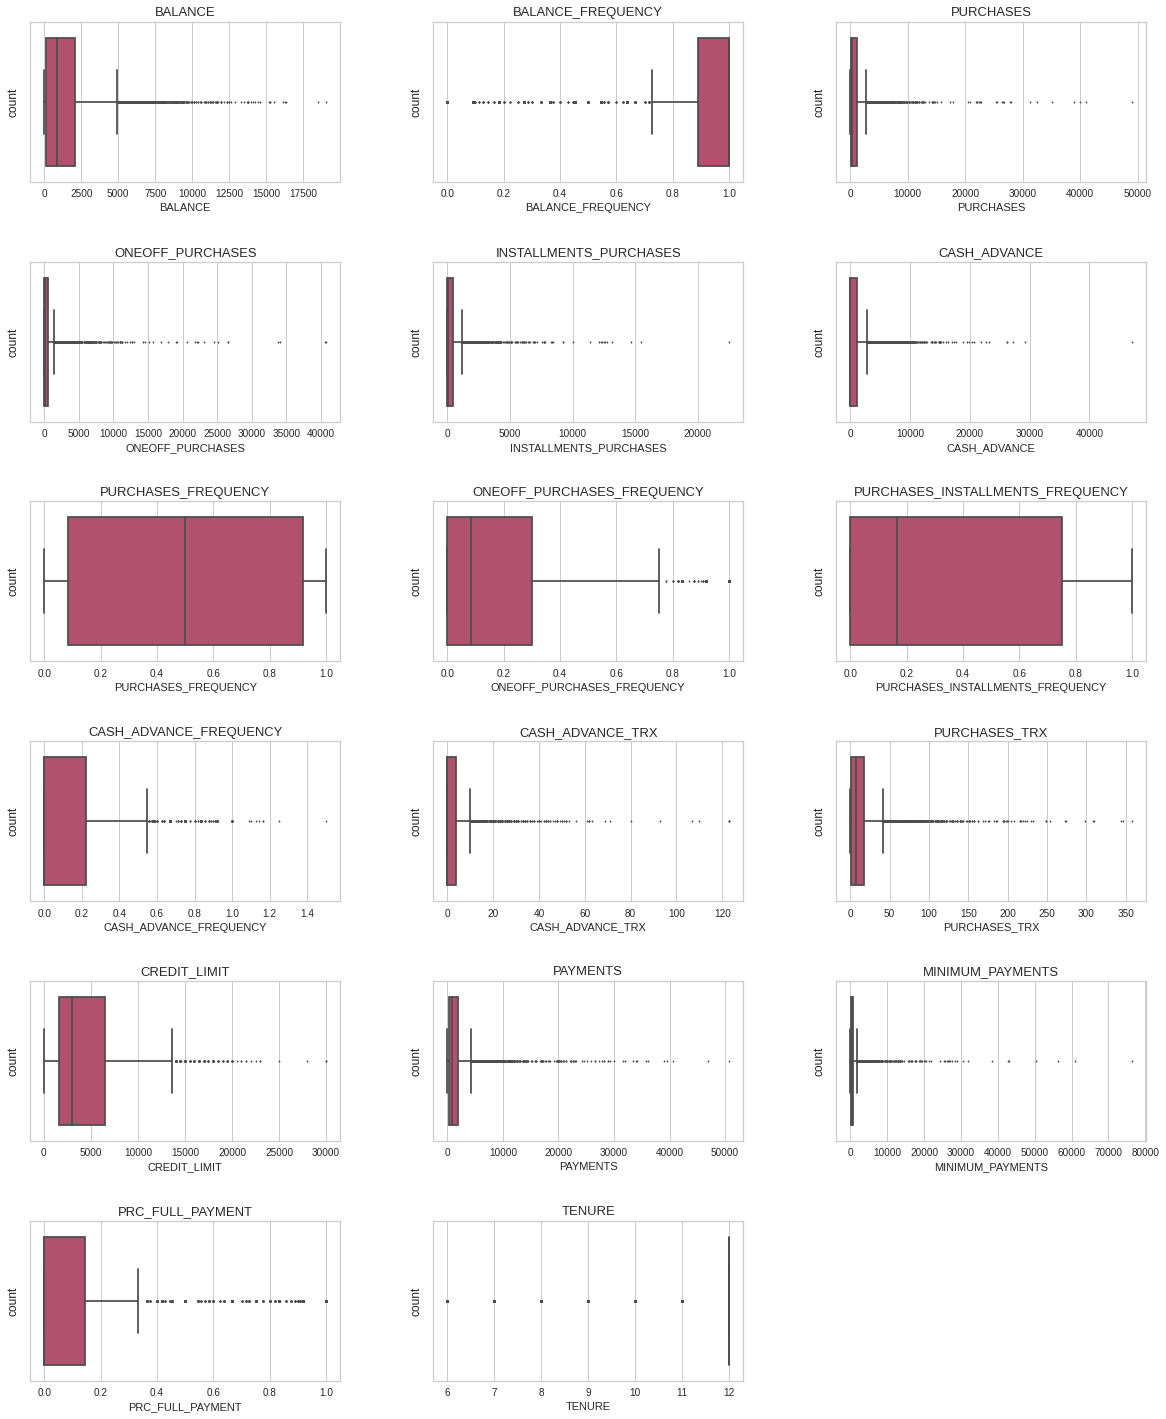

In [190]:
cols = df.columns.to_list()
plt.figure(figsize =(20,25))
for i, col in enumerate(cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)
    plt.savefig('outliers_cek.png')

Terdapat banyak dari fitur - fitur ini memiliki outliers, tetapi outliers tersebut terlihat seperti natural outliers bukan terjadi karena kesalahan input atau pengukuran. Ada kemungkinan terdapat nasabah/pelanggan yang melakukan transaksi dengan nominal yang sangat besar.

#### Cek Correlation Matrix

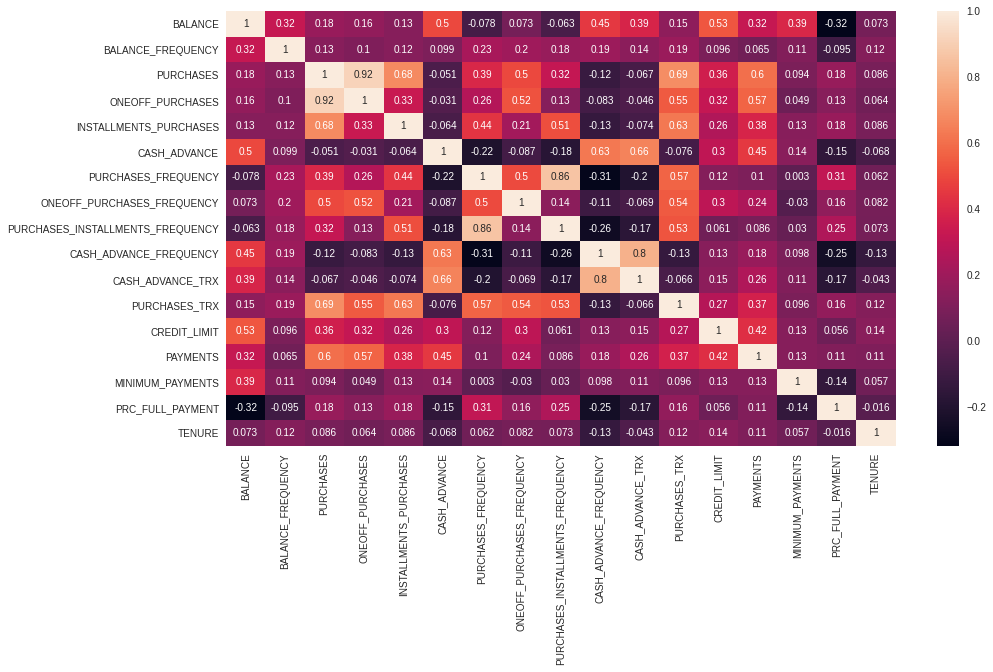

In [191]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.savefig('corr_matrix.png')


variabel-variabel yang berkorelasi tinggi tidak berguna untuk algoritma segmentasi karena mereka merepresentasikan karakteristik yang sama dari sebuah segmen. variabel atau fitur yang memiliki korelasi tinggi yaitu PURCHASES dan ONEOFF_PURCHASES dengan skor 0.92, PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY dengan skor 0.86, CASH_ADVANCE_FREQUENCY dan CASH_ADVANCE_TRX dengan skor 0.8. Daripada membuang fitur-fitur tersebut dan kehilangan informasi, Untuk menangani issue ini akan digunakan metode PCA yang mana dapat membantu mempertahankan informasi dan diwaktu yang sama bisa didapatkan variabel independent

## Preprocessing Data

#### Scaling data
Pada projek ini digunakan 3 teknik data scaler yaitu MinMax Scaler, Robust Scaler dan Standard Scaler untuk dibandingkan hasilnya dan akan dipilih teknik yang menghasilkan score paling optimal


In [192]:
MM_scaler = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
RB_scaler = pd.DataFrame(RobustScaler().fit_transform(df), columns=df.columns)
SS_scaler = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [193]:
MM_scaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,0.082154,0.109306,0.0,0.006736,0.045864,0.107868,1.0
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.888889,1.000000,1.000000,1.0
PURCHASES,8950.0,0.020457,0.043570,0.0,0.000808,0.007367,0.022637,1.0
ONEOFF_PURCHASES,8950.0,0.014534,0.040722,0.0,0.000000,0.000932,0.014166,1.0
INSTALLMENTS_PURCHASES,8950.0,0.018270,0.040193,0.0,0.000000,0.003956,0.020828,1.0
CASH_ADVANCE,8950.0,0.020766,0.044491,0.0,0.000000,0.000000,0.023629,1.0
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.0,0.000000,0.083333,0.300000,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8950.0,0.090096,0.133414,0.0,0.000000,0.000000,0.148148,1.0


In [194]:
RB_scaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,0.358848,1.080833,-0.453504,-0.386894,2.951740e-17,0.613106,9.434627
BALANCE_FREQUENCY,8950.0,-1.104565,2.132138,-9.000009,-1.000000,0.000000e+00,0.000000,0.000000
PURCHASES,8950.0,0.599652,1.995932,-0.337489,-0.300464,2.654940e-17,0.699536,45.472693
ONEOFF_PURCHASES,8950.0,0.960223,2.874738,-0.065812,-0.065812,0.000000e+00,0.934188,70.528052
INSTALLMENTS_PURCHASES,8950.0,0.687243,1.929718,-0.189912,-0.189912,0.000000e+00,0.810088,47.821611
CASH_ADVANCE,8950.0,0.878840,1.882855,0.000000,0.000000,0.000000e+00,1.000000,42.320270
PURCHASES_FREQUENCY,8950.0,-0.011579,0.481645,-0.600000,-0.500000,0.000000e+00,0.500000,0.600000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.397082,0.994454,-0.277777,-0.277777,0.000000e+00,0.722223,3.055557
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.263694,0.529930,-0.222223,-0.222223,0.000000e+00,0.777777,1.111111
CASH_ADVANCE_FREQUENCY,8950.0,0.608150,0.900547,0.000000,0.000000,0.000000e+00,1.000000,6.750007


In [195]:
SS_scaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,-2.540488e-17,1.000056,-0.751640,-0.690008,-0.332029,2.352559e-01,8.397489
BALANCE_FREQUENCY,8950.0,1.587805e-16,1.000056,-3.703271,0.049045,0.518084,5.180838e-01,0.518084
PURCHASES,8950.0,3.175610e-18,1.000056,-0.469552,-0.451001,-0.300454,5.004652e-02,22.483510
ONEOFF_PURCHASES,8950.0,-6.033659e-17,1.000056,-0.356934,-0.356934,-0.334040,-9.056763e-03,24.201066
INSTALLMENTS_PURCHASES,8950.0,3.175610e-17,1.000056,-0.454576,-0.454576,-0.356156,6.366321e-02,24.426889
CASH_ADVANCE,8950.0,-6.351220e-18,1.000056,-0.466786,-0.466786,-0.466786,6.435242e-02,22.011117
PURCHASES_FREQUENCY,8950.0,9.328354e-17,1.000056,-1.221758,-1.014125,0.024043,1.062211e+00,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,1.905366e-17,1.000056,-0.678661,-0.678661,-0.399319,3.269728e-01,2.673451
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,5.716098e-17,1.000056,-0.916995,-0.916995,-0.497629,9.701506e-01,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,-1.595744e-16,1.000056,-0.675349,-0.675349,-0.675349,4.351492e-01,6.820521


## Reduksi Dimensi menggunakan PCA

set parameter n_components = 0.9, yang berarti bahwa PCA secara otomatis akan menghasilkan cukup banyak principal component yang akan mempertahankan 90% varians dalam dataset.

In [196]:
pca = PCA(n_components=0.9, random_state=42)
pca_MM = pca.fit(MM_scaler)
pc_MM = ['PC'+str(n) for n in range(1, len(pca_MM.components_)+1)]
df_pca_MM = pd.DataFrame(pca_MM.transform(MM_scaler), columns=pc_MM)

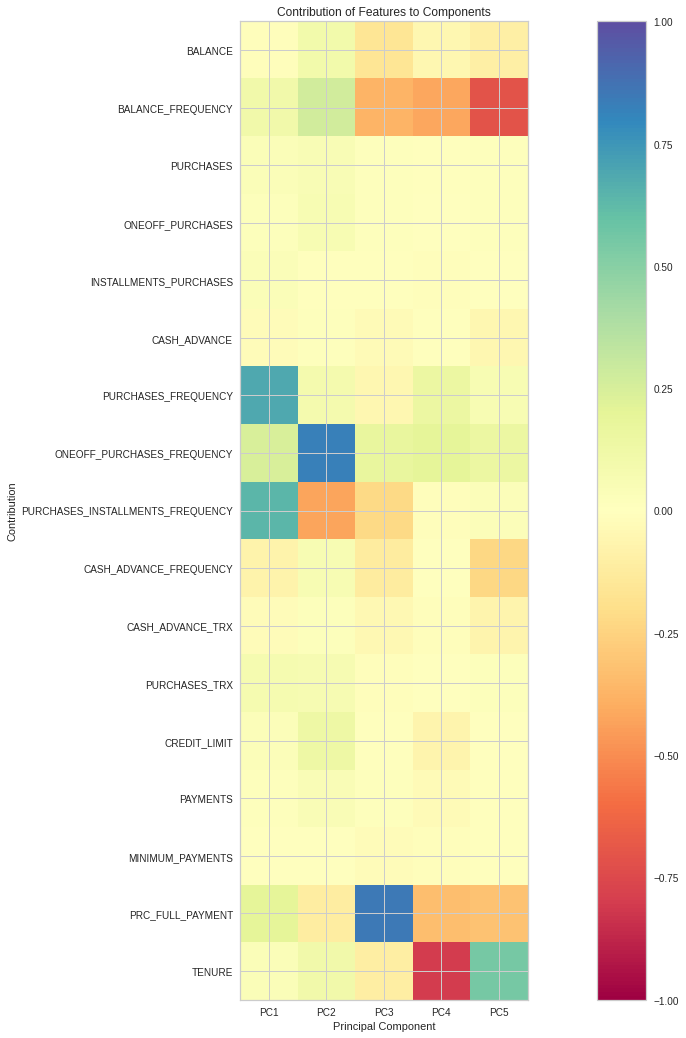

In [197]:
fig, ax = plt.subplots(figsize=(25, 18))
plt.imshow(pca_MM.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(MM_scaler.columns)), MM_scaler.columns)
plt.xticks(range(len(df_pca_MM.columns)), df_pca_MM.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()


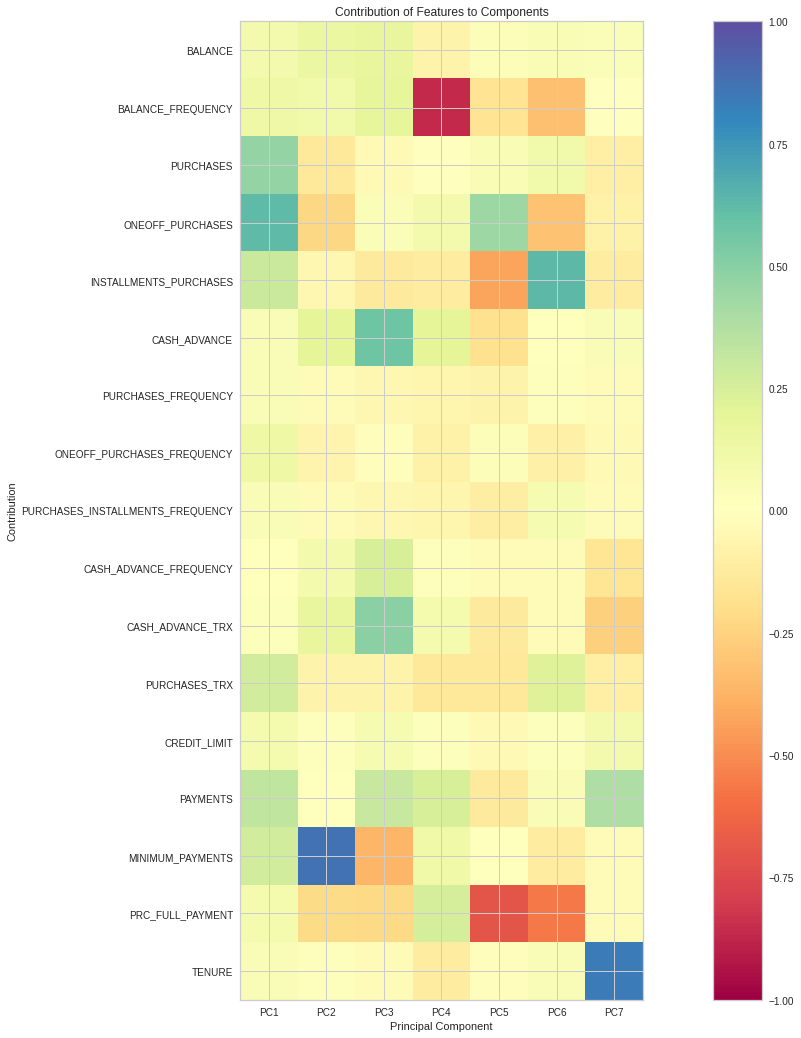

In [198]:
pca_RB = pca.fit(RB_scaler)
pc_RB = ['PC'+str(n) for n in range(1, len(pca_RB.components_)+1)]
df_pca_RB = pd.DataFrame(pca_RB.transform(RB_scaler), columns=pc_RB)
fig, ax = plt.subplots(figsize=(25, 18))
plt.imshow(pca_RB.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(RB_scaler.columns)), RB_scaler.columns)
plt.xticks(range(len(df_pca_RB.columns)), df_pca_RB.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

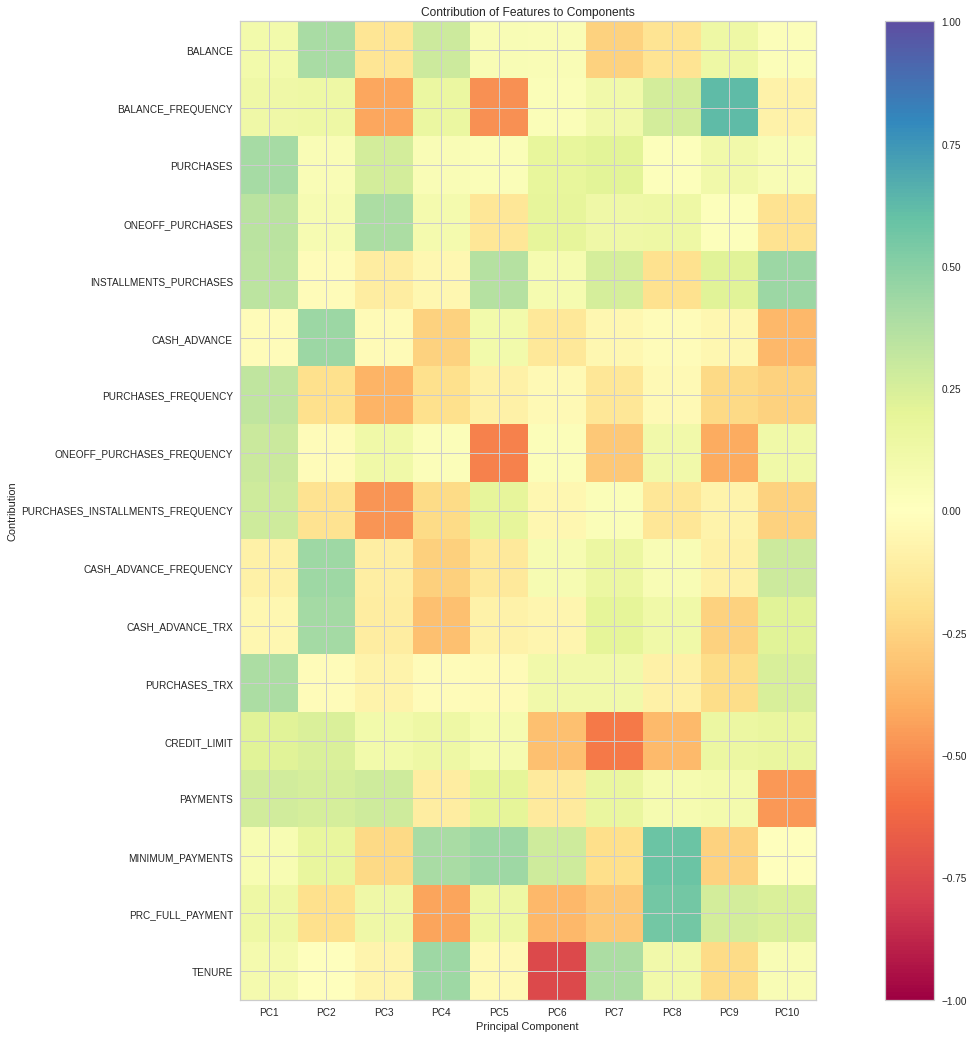

In [199]:
pca_SS = pca.fit(SS_scaler)
pc_SS = ['PC'+str(n) for n in range(1, len(pca_SS.components_)+1)]
df_pca_SS = pd.DataFrame(pca_SS.transform(SS_scaler), columns=pc_SS)
fig, ax = plt.subplots(figsize=(25, 18))
plt.imshow(pca_SS.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(SS_scaler.columns)), SS_scaler.columns)
plt.xticks(range(len(df_pca_SS.columns)), df_pca_SS.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

## Clustering

##### Menemukan parameter n_clusters menggunakan metode elbow

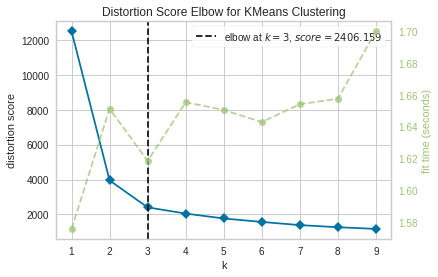

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [220]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer_MM = KElbowVisualizer(model, k=(1,10))
visualizer_MM.fit(df_pca_MM)
visualizer_MM.show()


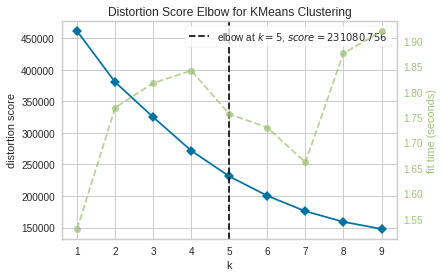

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [221]:
# Elbow Method using RobustScaler dataframe
visualizer_RB = KElbowVisualizer(model, k=(1,10))
visualizer_RB.fit(df_pca_RB)
visualizer_RB.show()


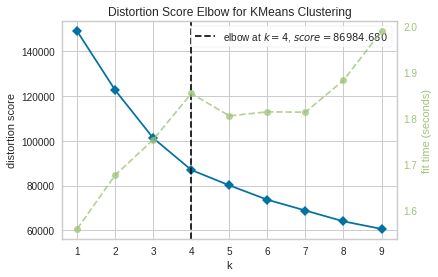

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [222]:
# Elbow Method using StandardScaler dataframe
visualizer_SS = KElbowVisualizer(model, k=(1,10))
visualizer_SS.fit(df_pca_SS)
visualizer_SS.show()


dari hasil visualisasi diatas masing masing akan dilakukan percobaan dengan nilai k yang berbeda untuk mendapatkan hasil cluster yang optimal

In [203]:
# create model Kmeans using dataframe Minmaxscaler
model_Kmeans_MM = KMeans(visualizer_MM.elbow_value_, random_state=42)
labels_MM = model_Kmeans_MM.fit_predict(df_pca_MM)

In [204]:
# create model Kmeans using dataframe Robustscaler
model_Kmeans_RB = KMeans(visualizer_RB.elbow_value_, random_state=42)
labels_RB = model_Kmeans_RB.fit_predict(df_pca_RB)

In [205]:
# create model Kmeans using dataframe Standardscaler
model_Kmeans_SS = KMeans(visualizer_SS.elbow_value_, random_state=42)
labels_SS = model_Kmeans_SS.fit_predict(df_pca_SS)

In [206]:
MM_scaler['LABELS'] = labels_MM
df_pca_MM['LABELS'] = labels_MM

RB_scaler['LABELS'] = labels_RB
df_pca_RB['LABELS'] = labels_RB

SS_scaler['LABELS'] = labels_SS
df_pca_SS['LABELS'] = labels_SS

##### LIhat distribusi data antara 4 clusters

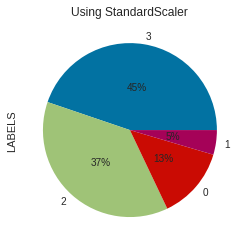

In [207]:
df_pca_SS.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, title="Using StandardScaler")


##### LIhat distribusi data antara 3 clusters

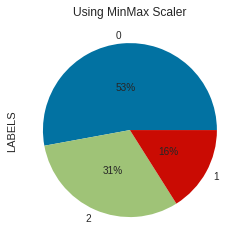

In [208]:
df_pca_MM.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, 
                                         title="Using MinMax Scaler")


##### LIhat distribusi data antara 5 clusters

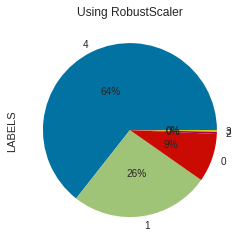

In [209]:
df_pca_RB.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, 
                                         labeldistance=1.1, title="Using RobustScaler")


## Evaluasi Clusters

* Semakin kecil nilai DaviesBouldin Index (DBI) yang diperoleh (non-negatif >= 0), maka semakin baik cluster yang diperoleh dari pengelompokan menggunakan algoritma clustering (Bates & Kalita 2016)
* Silhouette Coefficient sebuah nilai antara -1 dan 1. Semakin tinggi scorenya, semakin baik. score 1 mengindikasikan cluster yang kuat dan 0 berarti overlapping cluster.

In [210]:
print("=========================using MinMaxScaler============================")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_MM, labels_MM)}')
print(f'Silhouette Score = {silhouette_score(df_pca_MM, labels_MM)}')
print("========================================================================\n")

print("=========================using RobustScaler============================")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_RB, labels_RB)}')
print(f'Silhouette Score = {silhouette_score(df_pca_RB, labels_RB)}')
print("========================================================================\n")

print("=========================using StandardScaler============================")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_SS, labels_SS)}')
print(f'Silhouette Score = {silhouette_score(df_pca_SS, labels_SS)}')
print("========================================================================\n")

=========================using MinMaxScaler============================
Davies-Bouldin index = 0.7637431909603731
Silhouette Score = 0.5883262476576551

=========================using RobustScaler============================
Davies-Bouldin index = 1.0322424645815649
Silhouette Score = 0.34428519630421506

=========================using StandardScaler============================
Davies-Bouldin index = 1.3724191533464936
Silhouette Score = 0.2548969919626384



Dari hasil score diatas terlihat jelas bahwa melakukan fitur scaling menggunakan MinMaxScaler menghasilkan hasil cluster yang optimal, hal itu dibuktikan dengan score DBI paling rendah diantara yang lain dengan score 0.76 dimana untuk score DBI semakin mendekati nol maka semakin baik cluster tersebut. selain itu dilihat dari Silhouette Score memiliki nilai yang lebih tinggi dibanding dengan yang lain dengan nilai 0.5.88 / 0.59, untuk Silhouette Score semakin mendekati nilai 1 maka semakin baik pula hasil cluster yang telah terbentuk.

## Analisa Hasil Cluster

In [218]:
def plotting(data, title):
    mean = data.groupby("LABELS").mean().to_numpy()
    name_cols = data.columns[0:-1]
    lines_plot = np.linspace(start=0, stop=2 * np.pi, num=len(name_cols))
    cat = np.arange(0, len(mean))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(mean)):
        plt.plot(lines_plot, mean[i], label=f'class {cat[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(lines_plot), labels=name_cols)
    plt.legend()
    plt.show()
   

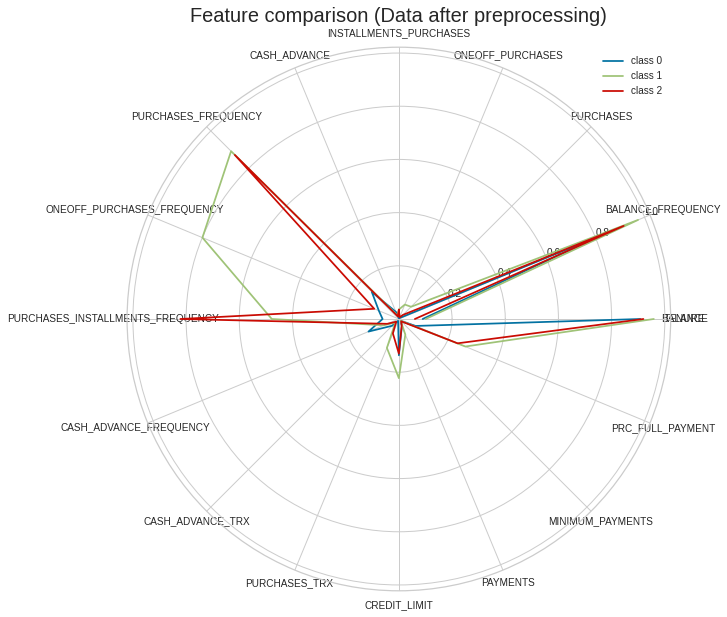

In [219]:
plotting(MM_scaler, 'Data after preprocessing')

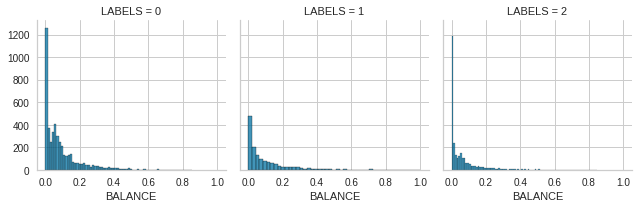

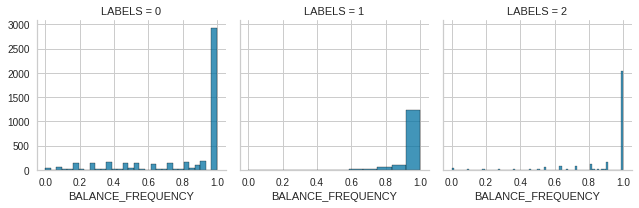

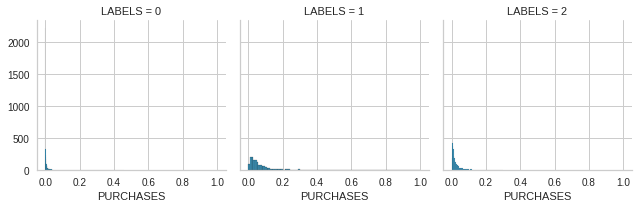

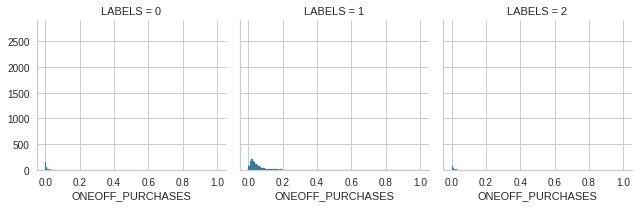

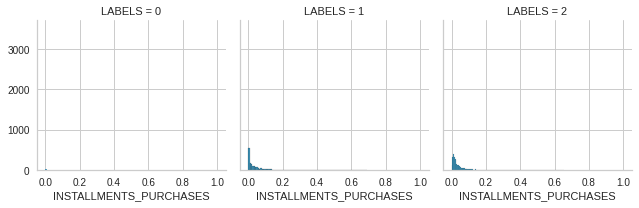

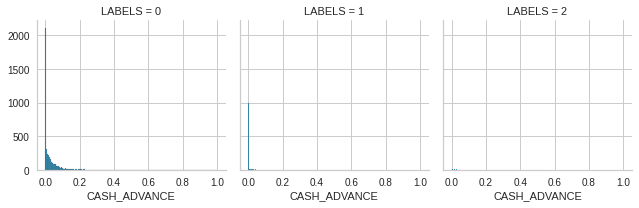

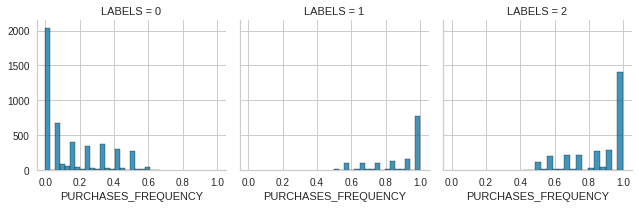

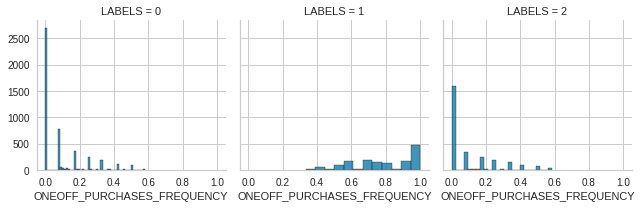

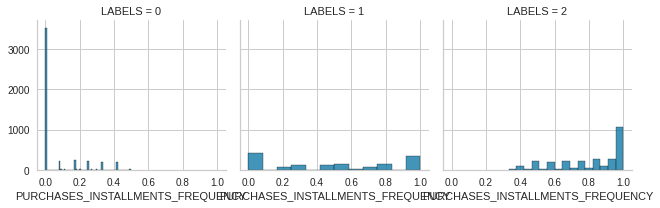

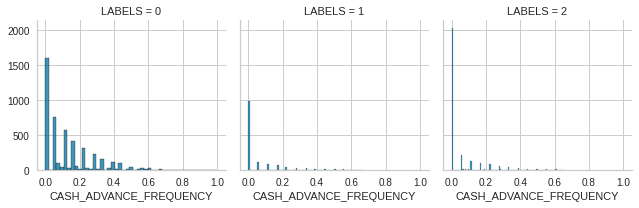

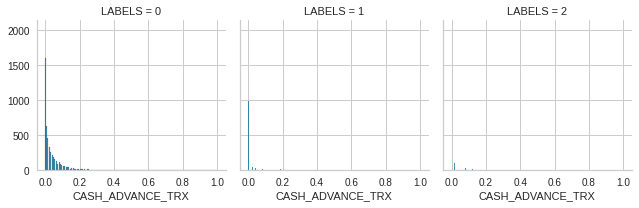

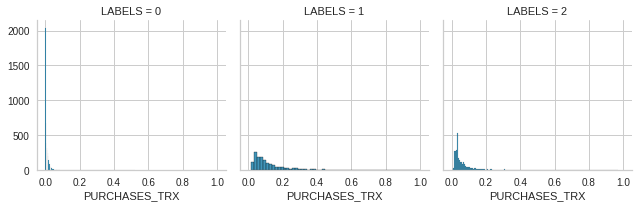

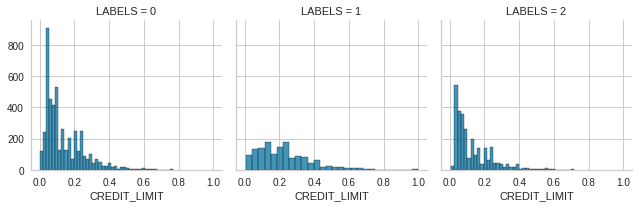

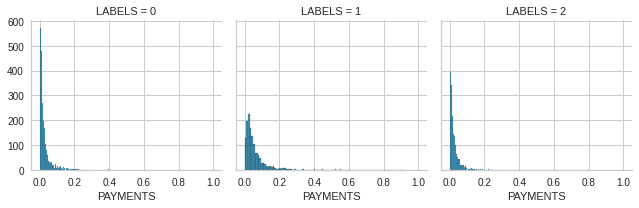

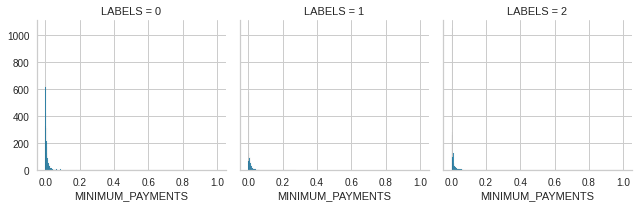

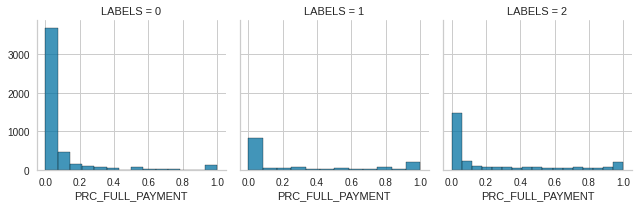

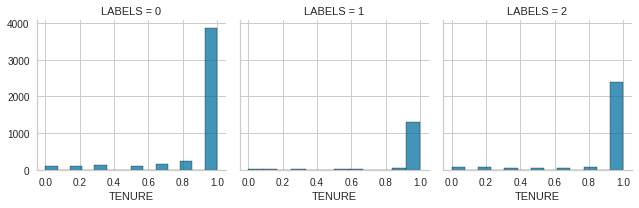

In [223]:
for x in MM_scaler.drop('LABELS', axis=1).columns:
    plot = sns.FacetGrid(MM_scaler, col='LABELS')
    plot.map(sns.histplot, x)



* cluster 0 ( Biru) : tipe user yang memiliki balance moderat, sangat jarang melakukan transaksi pembelian, lebih sering melakukan transaksi dengan uang tunai dimuka, hampir tidak pernah melakukan pembelian dengan metode mencicil. tipe user ini memiliki limit kartu kredit medium, tipikal user dengan tingkat periode tenur paling lama.
* cluster 1 (Hijau) : Memiliki balance dan limit kartu kredit paling tinggi, lebih sering melakukan pembelian dengan metode sekali bayar(one off purchases), sering melakukan transaksi belanja, hampir tidak pernah melakukan pembelian dengan uang tunai dimuka serta tipikal user dengan periode tenure rendah.
* cluster 2 (Merah) : Memiliki balance paling rendah diantara cluster lain, frekuensi pembelian cukup tinggi dan sering melakukan pembelian dengan metode pembayaran mencicil, memiliki limit kartu kredit paling rendah, user ini cenderung memiliki periode tenure medium.

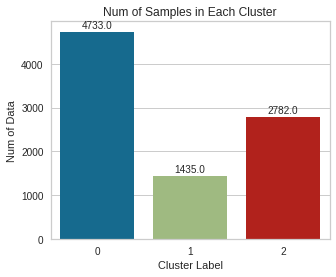

In [214]:
x = pd.Series(MM_scaler.LABELS).value_counts().sort_index().reset_index()
x.columns = ['Cluster Label', 'Num of Data']
plt.figure(figsize=(5,4))
plt.title("Num of Samples in Each Cluster")
ax = sns.barplot(data=x, x='Cluster Label', y='Num of Data')
for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')
plt.savefig('jumlah_titik.png')

jumlah titik data pada cluster 0 sebesar 2725, cluster 1 sebesar 4706, dan cluster 2 sebesar 1519

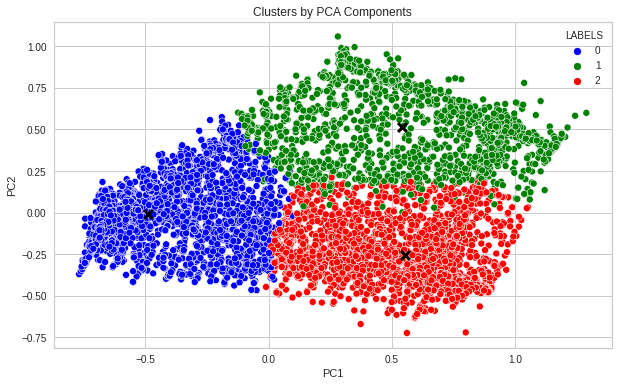

In [216]:
x_axis = df_pca_MM['PC1']
y_axis = df_pca_MM['PC2']
plt.figure(figsize=(10,6))
sns.scatterplot(x_axis, y_axis, hue=df_pca_MM['LABELS'], palette=['blue','green','red'])
centroid = model_Kmeans_MM.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1],
            marker='x', s=80, linewidths=4,
            color='black', zorder=10,lw=3)
plt.title('Clusters by PCA Components')
plt.show()


##### Save model to pickle

In [170]:
import pickle
model_Kmeans_MM.fit(df_pca_MM)
pickle.dump(model_Kmeans_MM, open('./cc_cluster_model.pkl','wb'))